## Project 4 - Team K

### Part A : Write your own Stochastic Gradient Descent code

x_1 : [9.60402005e-04 1.06657682e-03 5.17640792e-03 6.26787390e-03
 6.57515189e-03 7.52113090e-03 8.23184169e-03 9.30438408e-03
 9.85898424e-03 1.02240529e-02 1.04626788e-02 1.05701531e-02
 1.10043474e-02 1.16064658e-02 1.18886644e-02 1.28145868e-02
 1.41705741e-02 1.42368136e-02 1.48839874e-02 1.55131268e-02
 1.61954381e-02 1.71031806e-02 1.97905308e-02 2.00196533e-02
 2.01971961e-02 2.09919564e-02 2.11198019e-02 2.20635515e-02
 2.49314729e-02 2.60984323e-02 2.87600921e-02 3.16795011e-02
 3.40931833e-02 3.44403499e-02 3.70258964e-02 3.78216510e-02
 3.90235793e-02 3.97140811e-02 4.02155116e-02 4.17151446e-02
 4.22743904e-02 4.37347892e-02 4.38969362e-02 4.56973906e-02
 4.74717299e-02 4.85053705e-02 4.89374967e-02 5.12032197e-02
 5.17590977e-02 5.18555278e-02 5.37059572e-02 5.61662123e-02
 5.61749923e-02 5.67229651e-02 5.67855101e-02 5.67923400e-02
 6.21915446e-02 6.28025911e-02 6.29681899e-02 6.30564048e-02
 6.36291928e-02 6.38306528e-02 6.46225606e-02 6.73549607e-02
 6.83420591e-02 7.

X : [[1.00000000e+00 9.60402005e-04 5.69342589e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.06657682e-03 1.19947924e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 5.17640792e-03 1.71349470e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.00000000e+00 9.94505871e-01 9.98004081e-01 ... 1.34668832e-01
  1.35142534e-01 1.35617903e-01]
 [1.00000000e+00 9.94773385e-01 9.99125230e-01 ... 4.13175528e-01
  4.14983052e-01 4.16798482e-01]
 [1.00000000e+00 9.96802592e-01 9.99208289e-01 ... 4.50748592e-01
  4.51836435e-01 4.52926903e-01]]
Own inversion
[-0.0138918   1.02146027]
Eigenvalues of Hessian Matrix:[2.53366917 0.12682099]
Theta (from own gd
[[-6.22791203e+299]
 [-3.32421330e+299]]


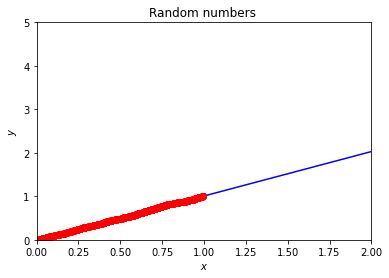

theta from own sdg
[[-0.01331996]
 [ 1.02214252]]


In [500]:
# Using Autograd to calculate gradients using SGD
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


def create_X(x, y, n ):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2)
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)
    
    return X



n = 1000
N = 1000
x = np.sort(np.random.uniform(0, 1, N))
print("x_1 :", x)
y = np.sort(np.random.uniform(0, 1, N))
z = FrankeFunction(x, y)
X = create_X(x, y, n=n)  

print("X :", X)


# n = 100
# x = 2*np.random.rand(n,1)
# y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((N,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 100


training_gradient = grad(CostOLS,2)

for iter in range(Niterations):
    gradients = (1.0/n)*training_gradient(y, X, theta)
    theta = theta - eta*gradients

    
print("Theta (from own gd")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 5.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

n_epochs = 50
M = 5   # size of each minibatch
m = int(n/M) # number of minibatches
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients

print("theta from own sdg")
print(theta)

### Part B : Write your own Neural Network 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import numpy as np


np.random.seed(0)

def relu(x):
    return np.where(np.asarray(x) > 0, x, 0)

def d_relu(x):
    return 1 * (x > 0)

def leaky_relu(x):
    return np.maximum(0.01, x)

def d_leaky_relu(x):
    if (x.all() < 0):
        return 0.01
    else:
        return  1


class NeuralNetwork:

    #
    # activation functions
    #

    @staticmethod
    def sigmoid(y):
        return 1 / (1 + np.exp(-y))

    @staticmethod
    def derivative_sigmoid(y):
        return y * (1 - y)

    def __init__(self, learning_rate, n_hidden_neurons, activation_function):

        #
        # neural network architecture
        # simple 2 x 2 x 1 that is enough for our 2 input problem 
        # input x hidden x output
        self.learning_rate = learning_rate
        self.hidden_neurons = n_hidden_neurons
        self.output = None
        self.activation_function = activation_function

        # weights with random values
        self.weights = [
            np.random.uniform(low=0.1, high=1, size=(2, self.hidden_neurons)),  # input layer
            np.random.uniform(low=0.1, high=1, size=(self.hidden_neurons, 1))  # hidden layer
        ]

        

    def activation(self, y):
        if self.activation_function == 1:
            return relu(y)
        if self.activation_function == 2:
            return self.sigmoid(y)
        if self.activation_function == 3:
            return leaky_relu(y)

        raise ValueError('Undefined activation function: {}'.format(activation_type))

    def derivative_activation(self, y):
        if self.activation_function == 1:
            return d_relu(y)
        if self.activation_function == 2:
            return self.derivative_sigmoid(y)
        if self.activation_function == 3:
            return d_leaky_relu(y)
        

        raise ValueError('Undefined derivative activation function: {}'.format(activation_function))

    #
    # forward pass
    # layer by layer
    #
    def feed_forward_pass(self, x_values):

        # forward
        input_layer = x_values
        hidden_layer = self.activation( np.dot(input_layer, self.weights[0]))
        output_layer = self.activation( np.dot(hidden_layer, self.weights[1]))

        self.layers = [
            input_layer,
            hidden_layer,
            output_layer
        ]

        # last layer is an output
        return self.layers[2]

    #
    # back propagation error through the network layers
    #
    def backward_pass(self, target_output, actual_output):

        # divergence of network output
        err = (target_output - actual_output)

        # backward from output to input layer
        # propagate gradients using chain rule
        for backward in range(2, 0, -1):
            err_delta = err * self.derivative_activation(self.layers[backward])

            # update weights using computed gradient
            self.weights[backward - 1] = self.weights[backward - 1] + self.learning_rate * np.dot(self.layers[backward - 1].T, err_delta)

            # propagate error using updated weights of previous layer
            err = np.dot(err_delta, self.weights[backward - 1].T)

    def train(self, x_values, target):
        
        self.output = self.feed_forward_pass(x_values)
        self.backward_pass(target, self.output)

    def predict(self, x_values):
        return self.feed_forward_pass(x_values)




Activation Function : ReLU
----------
Iteration number: 0 / Squared loss: 0.1722583144909385
----------
Iteration number: 1 / Squared loss: 0.16275994315788503
----------
Iteration number: 2 / Squared loss: 0.15785534479222246
----------
Iteration number: 3 / Squared loss: 0.15568181205493561
----------
Iteration number: 4 / Squared loss: 0.15443358341692873
----------
Input value: [0.84491107 0.63711254]
Predicted target: [0.37806007]
Actual target: 0.1548605565451813
----------
Input value: [0.60425453 0.88117881]
Predicted target: [0.31045107]
Actual target: 0.1217704284049027
----------
Input value: [0.4744613  0.38413539]
Predicted target: [0.21478306]
Actual target: 0.46772684414392485
----------
Input value: [0.85554951 0.34359555]
Predicted target: [0.35442336]
Actual target: 0.5478733059615492
----------
Input value: [0.75283716 0.55852789]
Predicted target: [0.33599889]
Actual target: 0.2965899537861682
----------
Input value: [0.36973496 0.14219545]
Predicted target: [0.1525

Input value: [0.55578513 0.88092424]
Predicted target: [0.29218112]
Actual target: 0.11672281591642472
----------
Input value: [0.85324502 0.5454705 ]
Predicted target: [0.37256709]
Actual target: 0.2684203954570357
----------
Input value: [0.51485386 0.9041879 ]
Predicted target: [0.27896364]
Actual target: 0.12085892565417344
----------
Input value: [0.49604481 0.30922195]
Predicted target: [0.21585317]
Actual target: 0.5193300004958682
----------
Input value: [0.10289808 0.30032894]
Predicted target: [0.06701826]
Actual target: 0.9769944823443636
----------
Input value: [0.42847793 0.82294731]
Predicted target: [0.23879731]
Actual target: 0.0344334208613811
----------
Input value: [0.06972148 0.80467586]
Predicted target: [0.10202518]
Actual target: 0.3121121211040741
----------
Input value: [0.76837556 0.99828125]
Predicted target: [0.38326125]
Actual target: 0.07700039433299803
----------
Input value: [0.74527195 0.59187516]
Predicted target: [0.33629144]
Actual target: 0.24511427

/home/nochrysoula/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


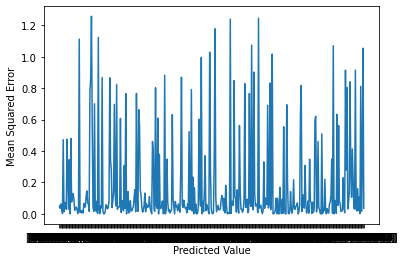

In [48]:
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4



# generate random numbers for x, y #
N = 2000
x = np.random.random((1, N))
y = np.random.random((1, N))

z = FrankeFunction(x, y)

x = np.ravel(x)
y = np.ravel(y)
z = np.ravel(z)

X = np.zeros((x.shape[0], 2))
X[:, 0] = x
X[:, 1] = y


train_size = 0.8
test_size = 1 - train_size

X_train, X_test, Y_train, Y_test = train_test_split(X, z, train_size=train_size,
                                                    test_size=test_size, random_state=11)

# activation functions : #
# 1 -> reLU              #
# 2 -> sigmoid           #
# 3 -> leaky reLU        #
network = NeuralNetwork(learning_rate=0.001, n_hidden_neurons = 2, activation_function = 1)
iterations = 5

Ntrain = (int)(0.8*N)
Y_train = np.reshape(Y_train,(Ntrain,1))

# training
print("Activation Function : ReLU")
for i in range(iterations):
    network.train(X_train, Y_train)
    print('-' * 10)
    print("Iteration number: " + str(i) + ' / ' + "Squared loss: " + str(np.mean(np.square(Y_train - network.output))))

# predict
for i in range(len(X_test)):
    print('-' * 10)
    print('Input value: ' + str(X_test[i]))
    print('Predicted target: ' + str(network.predict(X_test[i])))
    print('Actual target: ' + str(Y_test[i]))
    
    
expected_values = np.hstack(Y_test)
expected_values = np.reshape(expected_values,((int)(0.2*N),1))
predicted_outputs = network.predict(X_test)


# calculate errors
errors = list()
for i in range(len(expected_values)):
	# calculate error
	err = (expected_values[i] - predicted_outputs[i])**2
	# store error
	errors.append(err)
	# report error
	print('expected value : %.1f, predicted value : %.1f, error : %.3f' % (expected_values[i], predicted_outputs[i], err))


print("MSE : ", mean_squared_error(expected_values, predicted_outputs))

# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted_outputs)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()



### Part C : Testing Different Activation Functions 

Activation Function : Sigmoid
----------
Iteration number: 0 / Squared loss: 0.18917951742435124
----------
Iteration number: 1 / Squared loss: 0.17894022598311174
----------
Iteration number: 2 / Squared loss: 0.16916718486559354
----------
Iteration number: 3 / Squared loss: 0.15993862194819589
----------
Iteration number: 4 / Squared loss: 0.15131165759784507
----------
Input value: [0.70700606 0.52220144]
Predicted target: [0.64813215]
Actual target: 0.36070825815850827
----------
Input value: [0.89860422 0.62018988]
Predicted target: [0.65169457]
Actual target: 0.14228861657884379
----------
Input value: [0.36115576 0.14185936]
Predicted target: [0.63577352]
Actual target: 0.8653410639292567
----------
Input value: [0.28146481 0.02501683]
Predicted target: [0.63202904]
Actual target: 0.8326098076722501
----------
Input value: [0.5182067 0.8294849]
Predicted target: [0.6556748]
Actual target: 0.06443850160874233
----------
Input value: [0.67618696 0.49541333]
Predicted target: [0.6

Predicted target: [0.65588097]
Actual target: 0.05240569706084451
----------
Input value: [0.72700965 0.02938837]
Predicted target: [0.63426051]
Actual target: 0.28205824163801246
----------
Input value: [0.62888454 0.71419837]
Predicted target: [0.65305238]
Actual target: 0.15227464631452986
----------
Input value: [0.8882043 0.1054615]
Predicted target: [0.63720468]
Actual target: 0.2549870747120452
----------
Input value: [0.49254708 0.39796685]
Predicted target: [0.64367728]
Actual target: 0.4395204791139489
----------
Input value: [0.6829643 0.4947658]
Predicted target: [0.64726061]
Actual target: 0.4014474650927265
----------
Input value: [0.01384579 0.54461056]
Predicted target: [0.64559372]
Actual target: 0.4430376697376983
----------
Input value: [0.57475534 0.22673061]
Predicted target: [0.6392045]
Actual target: 0.4871910377339128
----------
Input value: [0.18367084 0.65796896]
Predicted target: [0.64951663]
Actual target: 0.34049786359398093
----------
Input value: [0.74963

/home/nochrysoula/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


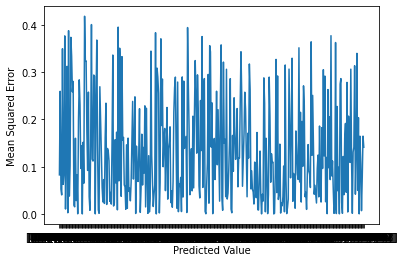

In [49]:
# generate random numbers for x, y #
N = 2000
x = np.random.random((1, N))
y = np.random.random((1, N))

z = FrankeFunction(x, y)

x = np.ravel(x)
y = np.ravel(y)
z = np.ravel(z)

X = np.zeros((x.shape[0], 2))
X[:, 0] = x
X[:, 1] = y


train_size = 0.8
test_size = 1 - train_size

X_train, X_test, Y_train, Y_test = train_test_split(X, z, train_size=train_size,
                                                    test_size=test_size, random_state=11)

# activation functions : #
# 1 -> reLU              #
# 2 -> sigmoid           #
# 3 -> leaky reLU        #
network = NeuralNetwork(learning_rate=0.001, n_hidden_neurons = 2, activation_function = 2)
iterations = 5

Ntrain = (int)(0.8*N)
Y_train = np.reshape(Y_train,(Ntrain,1))

# training
print("Activation Function : Sigmoid")
for i in range(iterations):
    network.train(X_train, Y_train)
    print('-' * 10)
    print("Iteration number: " + str(i) + ' / ' + "Squared loss: " + str(np.mean(np.square(Y_train - network.output))))

# predict
for i in range(len(X_test)):
    print('-' * 10)
    print('Input value: ' + str(X_test[i]))
    print('Predicted target: ' + str(network.predict(X_test[i])))
    print('Actual target: ' + str(Y_test[i]))
    
    
expected_values = np.hstack(Y_test)
expected_values = np.reshape(expected_values,((int)(0.2*N),1))
predicted_outputs = network.predict(X_test)


# calculate errors
errors = list()
for i in range(len(expected_values)):
	# calculate error
	err = (expected_values[i] - predicted_outputs[i])**2
	# store error
	errors.append(err)
	# report error
	print('expected value : %.1f, predicted value : %.1f, error : %.3f' % (expected_values[i], predicted_outputs[i], err))


print("MSE : ", mean_squared_error(expected_values, predicted_outputs))

# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted_outputs)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()




Activation Function : Leaky reLU
----------
Iteration number: 0 / Squared loss: 0.43658310699519204
----------
Iteration number: 1 / Squared loss: 0.2303114550574308
----------
Iteration number: 2 / Squared loss: 0.17126368981998244
----------
Iteration number: 3 / Squared loss: 0.2301128309676727
----------
Iteration number: 4 / Squared loss: 0.621171557298455
----------
Input value: [0.71571447 0.17355445]
Predicted target: [0.01]
Actual target: 0.46844716390985613
----------
Input value: [0.84621464 0.11746997]
Predicted target: [0.01]
Actual target: 0.311435267329764
----------
Input value: [0.9557775 0.5730584]
Predicted target: [0.01]
Actual target: 0.14393840444148165
----------
Input value: [0.18970084 0.37006128]
Predicted target: [0.01]
Actual target: 0.8908285125867651
----------
Input value: [0.08643849 0.09817262]
Predicted target: [0.01]
Actual target: 0.9605184966674498
----------
Input value: [0.14469083 0.8089715 ]
Predicted target: [0.01]
Actual target: 0.294570873501

Input value: [0.35541222 0.38365232]
Predicted target: [0.01]
Actual target: 0.6570492011384101
----------
Input value: [0.67076162 0.11627863]
Predicted target: [0.01]
Actual target: 0.38537762358737293
----------
Input value: [0.66927228 0.48802273]
Predicted target: [0.01]
Actual target: 0.40561961378217937
----------
Input value: [0.80977284 0.43891562]
Predicted target: [0.01]
Actual target: 0.5035732748446053
----------
Input value: [0.52696434 0.09597437]
Predicted target: [0.01]
Actual target: 0.445081942203725
----------
Input value: [0.92855389 0.62608348]
Predicted target: [0.01]
Actual target: 0.12033660526788027
----------
Input value: [0.90540844 0.61520441]
Predicted target: [0.01]
Actual target: 0.14263118150552734
----------
Input value: [0.56856976 0.54248672]
Predicted target: [0.01]
Actual target: 0.28667893364790703
----------
Input value: [0.12397061 0.51681328]
Predicted target: [0.01]
Actual target: 0.4954483494830007
----------
Input value: [0.68935752 0.672877

expected value : 0.5, predicted value : 0.0, error : 0.225
expected value : 0.4, predicted value : 0.0, error : 0.120
expected value : 0.1, predicted value : 0.0, error : 0.010
expected value : 0.5, predicted value : 0.0, error : 0.237
expected value : 0.8, predicted value : 0.0, error : 0.619
expected value : 0.4, predicted value : 0.0, error : 0.135
expected value : 0.2, predicted value : 0.0, error : 0.040
expected value : 0.2, predicted value : 0.0, error : 0.027
expected value : 0.4, predicted value : 0.0, error : 0.172
expected value : 1.1, predicted value : 0.0, error : 1.272
expected value : 0.1, predicted value : 0.0, error : 0.014
expected value : 0.3, predicted value : 0.0, error : 0.070
expected value : 0.2, predicted value : 0.0, error : 0.042
expected value : 0.1, predicted value : 0.0, error : 0.013
expected value : 0.1, predicted value : 0.0, error : 0.011
expected value : 0.1, predicted value : 0.0, error : 0.009
expected value : 0.4, predicted value : 0.0, error : 0.1

/home/nochrysoula/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


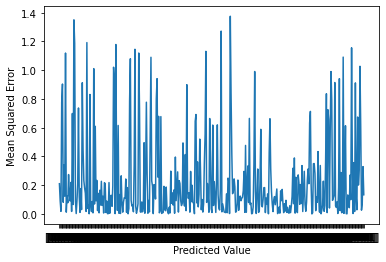

In [50]:
# generate random numbers for x, y #
N = 2000
x = np.random.random((1, N))
y = np.random.random((1, N))

z = FrankeFunction(x, y)

x = np.ravel(x)
y = np.ravel(y)
z = np.ravel(z)

X = np.zeros((x.shape[0], 2))
X[:, 0] = x
X[:, 1] = y


train_size = 0.8
test_size = 1 - train_size

X_train, X_test, Y_train, Y_test = train_test_split(X, z, train_size=train_size,
                                                    test_size=test_size, random_state=11)

# activation functions : #
# 1 -> reLU              #
# 2 -> sigmoid           #
# 3 -> leaky reLU        #
network = NeuralNetwork(learning_rate=0.001, n_hidden_neurons = 2, activation_function = 3)
iterations = 5

Ntrain = (int)(0.8*N)
Y_train = np.reshape(Y_train,(Ntrain,1))

# training
print("Activation Function : Leaky reLU")
for i in range(iterations):
    network.train(X_train, Y_train)
    print('-' * 10)
    print("Iteration number: " + str(i) + ' / ' + "Squared loss: " + str(np.mean(np.square(Y_train - network.output))))

# predict
for i in range(len(X_test)):
    print('-' * 10)
    print('Input value: ' + str(X_test[i]))
    print('Predicted target: ' + str(network.predict(X_test[i])))
    print('Actual target: ' + str(Y_test[i]))
    
    
expected_values = np.hstack(Y_test)
expected_values = np.reshape(expected_values,((int)(0.2*N),1))
predicted_outputs = network.predict(X_test)


# calculate errors
errors = list()
for i in range(len(expected_values)):
	# calculate error
	err = (expected_values[i] - predicted_outputs[i])**2
	# store error
	errors.append(err)
	# report error
	print('expected value : %.1f, predicted value : %.1f, error : %.3f' % (expected_values[i], predicted_outputs[i], err))


print("MSE : ", mean_squared_error(expected_values, predicted_outputs))

# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted_outputs)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Squared Error')
pyplot.show()





### Part D : Classification Analysis using Neural Networks

In [51]:
from sklearn.datasets import load_breast_cancer

def standarize(train, test):
	mean = np.mean(train, axis = 0)
	std = np.std(train, axis = 0) + 0.000001

	X_train = (train - mean) / std
	X_test = (test - mean) / std
	return X_train, X_test 

data = load_breast_cancer()
inputs = data.data[:, :2]
n_inputs = len(inputs)
outputs = data.target 
outputs = outputs.reshape(len(outputs), 1)

train_size = 0.8
test_size = 1 - train_size

X_train, X_test, Y_train, Y_test = train_test_split(inputs, outputs, train_size=train_size,
                                                    test_size=test_size)

In [52]:
def calc_accuracy_score(t_i, y_i):
    return np.sum(t_i == y_i) / len(t_i)

X_train_std, X_test_std = standarize(X_train, X_test)

# since it is a binary classification problem, we will use the sigmoid as activation function (parameter = 1) #
# activation functions : #
# 1 -> reLU              #
# 2 -> sigmoid           #
# 3 -> leaky reLU        #
network = NeuralNetwork(learning_rate=0.001, n_hidden_neurons = 2, activation_function = 2)
iterations = 5

Ntrain = (int)(0.8*N)
#Y_train = np.reshape(Y_train,(Ntrain,1))

# training
print("Activation Function : Sigmoid")
for i in range(iterations):
    network.train(X_train, Y_train)
    print('-' * 10)
    print("Iteration number: " + str(i) + ' / ' + "Squared loss: " + str(np.mean(np.square(Y_train - network.output))))

# predict
for i in range(len(X_test)):
    print('-' * 10)
    print('Input value: ' + str(X_test[i]))
    print('Predicted target: ' + str(network.predict(X_test[i])))
    print('Actual target: ' + str(Y_test[i]))
    
    
expected_values = np.hstack(Y_test)
#expected_values = np.reshape(expected_values,((int)(0.2*N),1))
predicted_outputs = network.predict(X_test)


# calculate errors
errors = list()
for i in range(len(expected_values)):
	# calculate error
	err = (expected_values[i] - predicted_outputs[i])**2
	# store error
	errors.append(err)
	# report error
	print('expected value : %.1f, predicted value : %.1f, error : %.3f' % (expected_values[i], predicted_outputs[i], err))





print("Accuracy Score for Breast Cancer dataset using sigmoid : ", calc_accuracy_score(expected_values, predicted_outputs.round()));




Activation Function : Sigmoid
----------
Iteration number: 0 / Squared loss: 0.2505141096012406
----------
Iteration number: 1 / Squared loss: 0.24948702600224057
----------
Iteration number: 2 / Squared loss: 0.2485005600634453
----------
Iteration number: 3 / Squared loss: 0.24755517625714185
----------
Iteration number: 4 / Squared loss: 0.24665112368998113
----------
Input value: [13.53 10.94]
Predicted target: [0.73956265]
Actual target: [1]
----------
Input value: [14.53 19.34]
Predicted target: [0.73956266]
Actual target: [1]
----------
Input value: [12.36 21.8 ]
Predicted target: [0.73956266]
Actual target: [1]
----------
Input value: [14.34 13.47]
Predicted target: [0.73956266]
Actual target: [1]
----------
Input value: [ 9.667 18.49 ]
Predicted target: [0.73956266]
Actual target: [1]
----------
Input value: [22.27 19.67]
Predicted target: [0.73956266]
Actual target: [0]
----------
Input value: [12.42 15.04]
Predicted target: [0.73956266]
Actual target: [1]
----------
Input va

In [53]:
def calc_accuracy_score(t_i, y_i):
    return np.sum(t_i == y_i) / len(t_i)

X_train_std, X_test_std = standarize(X_train, X_test)

# since it is a binary classification problem, we will use the sigmoid as activation function (parameter = 1) #
# activation functions : #
# 1 -> reLU              #
# 2 -> sigmoid           #
# 3 -> leaky reLU        #
network = NeuralNetwork(learning_rate=0.001, n_hidden_neurons = 2, activation_function = 1)
iterations = 5

Ntrain = (int)(0.8*N)
#Y_train = np.reshape(Y_train,(Ntrain,1))

# training
print("Activation Function : ReLU")
for i in range(iterations):
    network.train(X_train, Y_train)
    print('-' * 10)
    print("Iteration number: " + str(i) + ' / ' + "Squared loss: " + str(np.mean(np.square(Y_train - network.output))))

# predict
for i in range(len(X_test)):
    print('-' * 10)
    print('Input value: ' + str(X_test[i]))
    print('Predicted target: ' + str(network.predict(X_test[i])))
    print('Actual target: ' + str(Y_test[i]))
    
    
expected_values = np.hstack(Y_test)
#expected_values = np.reshape(expected_values,((int)(0.2*N),1))
predicted_outputs = network.predict(X_test)


# calculate errors
#errors = list()
for i in range(len(expected_values)):
	# calculate error
	err = (expected_values[i] - predicted_outputs[i])**2
	# store error
	errors.append(err)
	# report error
	print('expected value : %.1f, predicted value : %.1f, error : %.3f' % (expected_values[i], predicted_outputs[i], err))





print("Accuracy Score for Breast Cancer dataset using reLU : ", calc_accuracy_score(expected_values, predicted_outputs));

Activation Function : ReLU
----------
Iteration number: 0 / Squared loss: 146.7776972218767
----------
Iteration number: 1 / Squared loss: 0.6285714285714286
----------
Iteration number: 2 / Squared loss: 0.6285714285714286
----------
Iteration number: 3 / Squared loss: 0.6285714285714286
----------
Iteration number: 4 / Squared loss: 0.6285714285714286
----------
Input value: [13.53 10.94]
Predicted target: [0.]
Actual target: [1]
----------
Input value: [14.53 19.34]
Predicted target: [0.]
Actual target: [1]
----------
Input value: [12.36 21.8 ]
Predicted target: [0.]
Actual target: [1]
----------
Input value: [14.34 13.47]
Predicted target: [0.]
Actual target: [1]
----------
Input value: [ 9.667 18.49 ]
Predicted target: [0.]
Actual target: [1]
----------
Input value: [22.27 19.67]
Predicted target: [0.]
Actual target: [0]
----------
Input value: [12.42 15.04]
Predicted target: [0.]
Actual target: [1]
----------
Input value: [11.47 16.03]
Predicted target: [0.]
Actual target: [1]
--

In [54]:
from sklearn.metrics import accuracy_score

def calc_accuracy_score(t_i, y_i):
    return np.sum(t_i == y_i) / len(t_i)

X_train_std, X_test_std = standarize(X_train, X_test)

# since it is a binary classification problem, we will use the sigmoid as activation function (parameter = 1) #
# activation functions : #
# 1 -> reLU              #
# 2 -> sigmoid           #
# 3 -> leaky reLU        #
network = NeuralNetwork(learning_rate=0.001, n_hidden_neurons = 2, activation_function = 3)
iterations = 5

Ntrain = (int)(0.8*N)
#Y_train = np.reshape(Y_train,(Ntrain,1))

# training
print("Activation Function : Leaky reLU")
for i in range(iterations):
    network.train(X_train, Y_train)
    print('-' * 10)
    print("Iteration number: " + str(i) + ' / ' + "Squared loss: " + str(np.mean(np.square(Y_train - network.output))))

# predict
for i in range(len(X_test)):
    print('-' * 10)
    print('Input value: ' + str(X_test[i]))
    print('Predicted target: ' + str(network.predict(X_test[i])))
    print('Actual target: ' + str(Y_test[i]))
    
    
expected_values = np.hstack(Y_test)
#expected_values = np.reshape(expected_values,((int)(0.2*N),1))
predicted_outputs = network.predict(X_test)


# calculate errors
#errors = list()
for i in range(len(expected_values)):
	# calculate error
	err = (expected_values[i] - predicted_outputs[i])**2
	# store error
	errors.append(err)
	# report error
	print('expected value : %.1f, predicted value : %.1f, error : %.3f' % (expected_values[i], predicted_outputs[i], err))



print("Accuracy Score for Breast Cancer dataset using leaky reLU : ", accuracy_score(expected_values, (predicted_outputs).round(), normalize=False))

Activation Function : Leaky reLU
----------
Iteration number: 0 / Squared loss: 350.99662711599774
----------
Iteration number: 1 / Squared loss: 0.6160999999999999
----------
Iteration number: 2 / Squared loss: 1.1999107183488614e+26
----------
Iteration number: 3 / Squared loss: 0.6160999999999999
----------
Iteration number: 4 / Squared loss: 1.1478765444836084e+145
----------
Input value: [13.53 10.94]
Predicted target: [0.01]
Actual target: [1]
----------
Input value: [14.53 19.34]
Predicted target: [0.01]
Actual target: [1]
----------
Input value: [12.36 21.8 ]
Predicted target: [0.01]
Actual target: [1]
----------
Input value: [14.34 13.47]
Predicted target: [0.01]
Actual target: [1]
----------
Input value: [ 9.667 18.49 ]
Predicted target: [0.01]
Actual target: [1]
----------
Input value: [22.27 19.67]
Predicted target: [0.01]
Actual target: [0]
----------
Input value: [12.42 15.04]
Predicted target: [0.01]
Actual target: [1]
----------
Input value: [11.47 16.03]
Predicted targ

### Part e): Write your Logistic Regression code, final step

In [55]:
import numpy as np 
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
import math
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


In [56]:
data = load_breast_cancer()
inputs = data.data[:, :2]
n_inputs = len(inputs)
outputs = data.target 
outputs = outputs.reshape(len(outputs), 1)


In [57]:
X_train ,X_test,y_train,y_test = train_test_split(inputs,outputs,test_size=0.1)

In [58]:
# Standarize the inputs to achieve better accuracy #
X = inputs
X = (X - np.mean(X, axis =0)) /  np.std(X, axis = 0)


X = np.hstack([np.ones((X.shape[0], 1)),X])
X = MinMaxScaler().fit_transform(X)
Y = outputs
Y = np.array(Y)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [65]:
from autograd import grad

def Sigmoid(x):
    return 1/(1 + np.exp(-x))

def Hypothesis(theta, x):   
    return Sigmoid(x @ theta) 

def Cost_Function(X,Y,theta,m):
    hi = Hypothesis(theta, X)
    y = Y.reshape(-1, 1)
    J = 1/float(m) * np.sum(-_y * np.log(hi) - (1-y) * np.log(1-hi))
    return J

def Cost_Function_Derivative(X,Y,theta,m,alpha):
    hi = Hypothesis(theta,X)
    y = Y.reshape(-1, 1)
    J = alpha/float(m) * X.T @ (hi - y)
    return J

def CostOLS(y,X,theta):
    return np.sum(((y-X) @ theta)**2)

def learning_schedule(t):
    t0, t1 = 5, 50
    return t0/(t+t1)

def Accuracy(theta):
    correct = 0
    length = len(X_test)
    prediction = (Hypothesis(theta, X_test) > 0.5)
    y = Y_test.reshape(-1, 1)
    correct = prediction == y
    my_accuracy = (np.sum(correct) / length)*100
    print ('LR Accuracy %: ', my_accuracy)

def Logistic_Regression(X,Y,alpha,theta,num_iters, n_epochs, n_minibatches, minibatch_size):
    m = len(Y)
    training_gradient = grad(CostOLS,2)
    for epoch in range(n_epochs):
        for i in range(n_minibatches):
            random_index = np.random.randint(n_minibatches)
            xi = X[random_index:random_index+1]
            zi = z.ravel()[random_index:random_index+1]
            gradients = 2.0 * xi.T @ ((xi @ theta)-zi)
            eta = learning_schedule(epoch*n_minibatches+i)
            theta = theta - eta*gradients
           
    Accuracy(theta)

In [66]:
ep = .012
initial_theta = np.random.rand(X_train.shape[1],1) * 2 * ep - ep
alpha = 0.5
iterations = 100
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)
# transform training data
X_train_norm = norm.transform(X_train)
# transform testing dataabs
X_test_norm = norm.transform(X_test)
Logistic_Regression(X_train_norm,Y_train,alpha,initial_theta,iterations, 50, 4, 5)


LR Accuracy %:  59.44055944055944
